In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
import os
import plotly.io as pio

In [2]:
hours_per_project = pd.read_csv('hours_per_project.csv')

In [3]:
hours_per_project

,Project ID,Country/region,Project group,Customer account,Project date,Category,Worker,Hours,Cost price,Sales currency,Sales price
0,PR190001,FRA,SERVICE,1748,2018-10-09,PAID-TRAVELHRS,technician 1,13.5,65.0,EUR,95.0
1,PR190001,FRA,SERVICE,1748,2018-10-09,PAID-NOR-HRS,technician 1,17.5,65.0,EUR,115.0
2,PR190001,FRA,SERVICE,1748,2018-10-09,PAID-LABOUR-OVERTIME,technician 1,4.0,65.0,EUR,170.0
3,PR190001,FRA,SERVICE,1748,2018-10-12,PAID-TRAVELHRS,technician 1,13.5,65.0,EUR,95.0
4,PR190001,FRA,SERVICE,1748,2018-10-12,PAID-NOR-HRS,technician 1,17.5,65.0,EUR,115.0
...,...,...,...,...,...,...,...,...,...,...,...
5020,QTE-000192,DEU,SERVICE,10283,2021-04-22,PAID-NOR-HRS,technician 1,18.0,65.0,EUR,0.0
5021,QTE-000192,DEU,SERVICE,10283,2021-04-22,PAID-TRAVELHRSOVER,technician 1,8.5,65.0,EUR,0.0
5022,QTE-000194,POL,SERVICE,12430,2018-09-28,PAID-TRAVELHRS,technician 3,13.0,65.0,EUR,90.0
5023,QTE-000194,POL,SERVICE,12430,2018-09-28,PAID-NOR-HRS,technician 3,12.5,65.0,EUR,110.0


In [4]:
hours_per_project.columns

Index(['Project ID', 'Country/region', 'Project group', 'Customer account',
       'Project date', 'Category', 'Worker', 'Hours', 'Cost price',
       'Sales currency', 'Sales price'],
      dtype='object')

In [5]:
hours_per_project['Project group'].value_counts()

SERVICE    2791
WAR         956
INSTAL      946
MAIN        192
HD           90
TRAIN        40
GRATIS       10
Name: Project group, dtype: int64

In [6]:
hours_per_project['Category'].unique()

array(['PAID-TRAVELHRS', 'PAID-NOR-HRS', 'PAID-LABOUR-OVERTIME',
       'PAID-TRAVELHRSOVER', 'INST-TRAVELHRS', 'INST-NOR-HRS',
       'INST-LABOUR-OVERTIME', 'WAR-TRAVELHRS', 'WAR-NOR-HRS',
       'WAR-LABOUR-OVERTIME', 'TRN-TRAVELHRS', 'TRN-TRAVELHRSOVER',
       'TRN-NOR-HRS', 'TRN-LABOUR-OVERTIME', 'INST-TRAVELHRS-OVERTIME',
       'PAID-TRAVEL-OVERTIMEDOUBLE', 'PAID-LABOUR-OVERTIMEDOUBLE',
       'WAR-TRAVELHRSOVER', 'PAIDSER-WAIT',
       'INST-TRAVELHRS-OVERTIMEDOUBLE', 'INST-LABOUR-OVERTIMEDOUBLE',
       'INST-WAIT', 'HD-NOR-HRS', 'MAIN-TRAVELHRS', 'MAIN-TRAVELHRSOVER',
       'MAIN-NOR-HRS', 'MAIN-LABOUR-OVERTIME',
       'WAR-LABOUR-OVERTIMEDOUBLE', 'WAR-WAIT', 'GRATIS-TRAVELHRS',
       'GRATIS-NOR-HRS', 'GRATIS-TRAVELHRSOVER', 'HD-LABOUR-OVERTIME',
       'MAIN-WAIT', 'WAR-TRAVELOVERTIMEDOUBLE', 'TRN-WAIT',
       'HD-LABOUR-SUNDAYS', 'WAR_TRAVELHRS'], dtype=object)

In [7]:
hours_per_project['Cost'] = hours_per_project['Hours']*hours_per_project['Cost price']
hours_per_project['Revenue'] = hours_per_project['Hours']*hours_per_project['Sales price']
hours_per_project['Profit'] = hours_per_project['Revenue'] - hours_per_project['Cost']

In [8]:
# looking at some plots on revenues in the timeline, I suspect there is a mistake between the month of June/July 2020.

In [9]:
filtered_df = hours_per_project[(hours_per_project['Project date'] > '2020-06-01') & (hours_per_project['Project date'] < '2020-07-31')]

In [10]:
filtered_df.loc[(filtered_df['Revenue'] == 35190) | (filtered_df['Revenue'] == -35190)]

,Project ID,Country/region,Project group,Customer account,Project date,Category,Worker,Hours,Cost price,Sales currency,Sales price,Cost,Revenue,Profit
1340,PR200008,NLD,SERVICE,bvse-0040,2020-06-23,PAID-NOR-HRS,technician 5,306.0,65.0,EUR,115.0,19890.0,35190.0,15300.0
1341,PR200008,NLD,SERVICE,bvse-0040,2020-07-13,PAID-NOR-HRS,technician 5,306.0,-65.0,EUR,-115.0,-19890.0,-35190.0,-15300.0


In [11]:
hours_per_project.drop(1340, inplace=True)

In [12]:
hours_per_project.drop(1341, inplace=True)

In [13]:
travel_hours = hours_per_project[hours_per_project['Category'].str.contains('TRAVEL')]
working_hours = hours_per_project[~hours_per_project['Category'].str.contains('TRAVEL')]

In [14]:
hours_per_project['Travel or Work'] = ['Travel' if 'TRAVEL' in value else 'Work' for value in hours_per_project['Category']]

In [15]:
hours_per_project['Travel or Work'].value_counts()

Work      2796
Travel    2227
Name: Travel or Work, dtype: int64

In [16]:
hours_per_project.to_excel("hours_per_project_2.xlsx", index=False)

In [17]:
working_hours.groupby('Project group')['Hours'].agg(sum)

Project group
GRATIS        17.50
HD           177.55
INSTAL      7240.00
MAIN        1128.50
SERVICE    13433.40
TRAIN        269.50
WAR         6524.00
Name: Hours, dtype: float64

In [18]:
travel_hours.groupby('Project group')['Hours'].agg(sum)

Project group
GRATIS       20.50
HD           22.00
INSTAL     3103.50
MAIN        513.50
SERVICE    8198.15
TRAIN       157.00
WAR        2610.70
Name: Hours, dtype: float64

In [19]:
hours_per_project.dtypes

Project ID           object
Country/region       object
Project group        object
Customer account     object
Project date         object
Category             object
Worker               object
Hours               float64
Cost price          float64
Sales currency       object
Sales price         float64
Cost                float64
Revenue             float64
Profit              float64
Travel or Work       object
dtype: object

In [20]:
hours_per_project['Project date'] = pd.to_datetime(hours_per_project['Project date'])

In [21]:
hours_per_project['Year'] = hours_per_project['Project date'].dt.year

In [22]:
# revenues timeline by project group - save the plot to show how to handle a mistake in the data

#fig1 = px.line(
    #hours_per_project.sort_values(by="Project date"),
    #x = 'Project date',
    #y = 'Revenue',
    #title= " Revenues by Order Date",
    #markers="lines+markers",
    #color = 'Project group'
#)

#fig1.show()

#folder_path = r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\Mid-bootcamp project\pleriminary plots'
#file_path = os.path.join(folder_path, 'revenues by order date with mistake.png')
#pio.write_image(fig1, file_path)

In [23]:
# revenues timeline by project group - right plot

fig1 = px.line(
    hours_per_project.sort_values(by="Project date"),
    x = 'Project date',
    y = 'Revenue',
    title= " Revenues by Order Date",
    markers="lines+markers",
    color = 'Project group'
)

fig1.update_layout(hovermode='x unified')

fig1.show()

folder_path = r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\Mid-bootcamp project\plots'
file_path = os.path.join(folder_path, 'revenues by order date.png')
pio.write_image(fig1, file_path)

In [24]:
hours_per_project['Project group'].value_counts()

SERVICE    2789
WAR         956
INSTAL      946
MAIN        192
HD           90
TRAIN        40
GRATIS       10
Name: Project group, dtype: int64

In [25]:
# hours by timeline - per main project group (service, war and instal)

ser_ins_war_hours = hours_per_project[(hours_per_project['Project group'] == 'SERVICE') | 
                                      (hours_per_project['Project group'] == 'WAR') | 
                                      (hours_per_project['Project group'] == 'INSTAL')]

fig1b = px.line(
    ser_ins_war_hours.sort_values(by="Project date"),
    x = 'Project date',
    y = 'Hours',
    title= " Service, installation and warranty hours by date",
    markers="lines+markers",
    color = 'Project group'
)

fig1b.update_layout(hovermode='x unified')

fig1b.show()

folder_path = r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\Mid-bootcamp project\plots'
file_path = os.path.join(folder_path, 'ser-war-ins hours by order date.png')
pio.write_image(fig1b, file_path)

In [26]:
# warranty, service, installation hours 
total_swi_hours = ser_ins_war_hours.groupby([ 'Year', 'Project group']).agg({'Hours':'sum'}).reset_index()

fig1c = px.bar(total_swi_hours, 
               x='Hours', 
               y='Project group',
               title='Proportion of warranty, service and installation hours (2018 - 2023)',
               color = 'Year', 
               barmode = 'group', 
               orientation='h',  
)

fig1c.update_traces(textposition='outside')

fig1c.show()

folder_path = r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\Mid-bootcamp project\plots'
file_path = os.path.join(folder_path, 'warranty, service and installation per year.png')
pio.write_image(fig1c, file_path)

In [27]:
ser_ins_war_hours.to_csv('ser_ins_war_hours.csv', index=False)

In [28]:
total_swi_hours

,Year,Project group,Hours
0,2018,INSTAL,1448.00
1,2018,SERVICE,4812.00
2,2018,WAR,1196.50
3,2019,INSTAL,2201.50
4,2019,SERVICE,5366.55
5,2019,WAR,1917.00
6,2020,INSTAL,2187.50
7,2020,SERVICE,2575.00
8,2020,WAR,1700.00
9,2021,INSTAL,1105.00


In [29]:
# travel and work hours repartition
category_hours = hours_per_project.groupby(['Project group', 'Travel or Work']).agg({'Hours':'sum'}).reset_index()

fig2 = px.bar(category_hours.sort_values(by='Hours'), 
              x='Hours', 
              y='Project group', 
              title='Travel and work hours in aftermarket service (2018 - 2023)',
              color = 'Travel or Work', 
              barmode = 'group', 
              orientation='h', 
              text='Hours' 
)

fig2.update_traces(textposition='outside')


fig2.show()

In [30]:
for year in hours_per_project['Year'].unique():

    year_hours = hours_per_project[hours_per_project['Year'] == year]
    category_hours = year_hours.groupby(['Project group', 'Travel or Work']).agg({'Hours':'sum'}).reset_index()
    color_map = {'Work':'blue', 'Travel':'red'}

    fig3 = px.bar(
        category_hours.sort_values(by='Hours', ascending=True),
        x='Hours',
        y='Project group',
        title=f'Travel and work hours in aftermarket service ({year})',
        color='Travel or Work',
        barmode='group',
        orientation='h',
        text='Hours',
        color_discrete_map=color_map
    )
     
    fig3.update_traces(textposition='outside')
    fig3.update_layout(title=f'Travel and work hours by project group and year ({year})',
                       legend={'title': 'Travel or Work', 'orientation': 'v', 'x': 1, 'y': 1.1}
                       )

    fig3.show()

    folder_path = r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\Mid-bootcamp project\plots'
    file_path = os.path.join(folder_path, f'travel and work hours per project group_{year}.png')
    pio.write_image(fig3, file_path)

In [31]:
# import expenses and analyse total amount (*expenses are TRAVEL related and invoiced at cost, so they are not profitable)
expenses = pd.read_csv('expenses.csv')

In [32]:
expenses

,Project ID,Category,Quantity,Cost price,Sales price
0,QTE-000041,PAIDSER-SUBS,0.5,70.00,175.00
1,QTE-000041,PAIDSER-MILEAGE,832.0,0.36,0.45
2,QTE-000025,PAIDSER-SUBS,3.0,77.72,175.00
3,QTE-000025,PAIDSER-MILEAGE,990.0,0.36,0.45
4,QTE-000025,PAIDSER-OTH,1.0,10.00,10.00
...,...,...,...,...,...
5344,PR200130,MAIN-SUBS,5.0,148.76,0.00
5345,PR200130,MAIN-HOTEL,1.0,606.00,0.00
5346,PR200130,MAIN-MILEAGE,619.0,0.48,0.00
5347,PR200130,MAIN-SUBS,3.0,127.82,0.00


In [33]:
expenses['Cost'] = expenses['Quantity'] * expenses['Cost price']
expenses['Sales'] = expenses['Quantity'] * expenses['Sales price']


In [34]:
total_expenses_project = expenses.groupby('Project ID').agg({'Cost':'sum', 'Sales':'sum'})

In [35]:
hours_per_project.columns

Index(['Project ID', 'Country/region', 'Project group', 'Customer account',
       'Project date', 'Category', 'Worker', 'Hours', 'Cost price',
       'Sales currency', 'Sales price', 'Cost', 'Revenue', 'Profit',
       'Travel or Work', 'Year'],
      dtype='object')

In [36]:
total_hours_project = hours_per_project.groupby(['Project ID', 'Project date', 'Project group', 'Country/region', 'Year']).agg({'Cost':'sum', 'Revenue':'sum', 'Profit':'sum', 'Hours':'sum'}).reset_index()
total_hours_project

,Project ID,Project date,Project group,Country/region,Year,Cost,Revenue,Profit,Hours
0,PR190001,2018-10-09,SERVICE,FRA,2018,2275.0,3975.0,1700.0,35.0
1,PR190001,2018-10-12,SERVICE,FRA,2018,2275.0,3975.0,1700.0,35.0
2,PR190002,2018-10-09,SERVICE,ROU,2018,3445.0,6052.5,2607.5,53.0
3,PR190003,2018-10-12,SERVICE,TUR,2018,1950.0,2465.0,515.0,30.0
4,PR190004,2018-10-12,SERVICE,TUR,2018,650.0,1185.0,535.0,10.0
...,...,...,...,...,...,...,...,...,...
1447,QTE-000192,2019-09-27,SERVICE,DEU,2019,1072.5,1669.5,597.0,16.5
1448,QTE-000192,2019-10-25,SERVICE,DEU,2019,682.5,1138.5,456.0,10.5
1449,QTE-000192,2019-11-22,SERVICE,DEU,2019,1300.0,0.0,-1300.0,20.0
1450,QTE-000192,2021-04-22,SERVICE,DEU,2021,2210.0,0.0,-2210.0,34.0


In [37]:
total_hrs_exp = total_hours_project.merge(total_expenses_project, on='Project ID')
total_hrs_exp.rename(columns={'Cost_x': 'Cost hours', 'Cost_y':'Cost expenses'}, inplace=True)

In [38]:
total_hrs_exp['Total cost'] = total_hrs_exp['Cost expenses'] + total_hrs_exp['Cost hours']

In [39]:
total_hrs_exp

,Project ID,Project date,Project group,Country/region,Year,Cost hours,Revenue,Profit,Hours,Cost expenses,Sales,Total cost
0,PR190001,2018-10-09,SERVICE,FRA,2018,2275.0,3975.0,1700.0,35.0,2655.18,20197.44,4930.18
1,PR190001,2018-10-12,SERVICE,FRA,2018,2275.0,3975.0,1700.0,35.0,2655.18,20197.44,4930.18
2,PR190002,2018-10-09,SERVICE,ROU,2018,3445.0,6052.5,2607.5,53.0,1050.87,1206.87,4495.87
3,PR190003,2018-10-12,SERVICE,TUR,2018,1950.0,2465.0,515.0,30.0,1755.55,1769.14,3705.55
4,PR190004,2018-10-12,SERVICE,TUR,2018,650.0,1185.0,535.0,10.0,0.01,175.00,650.01
...,...,...,...,...,...,...,...,...,...,...,...,...
1311,QTE-000192,2019-09-27,SERVICE,DEU,2019,1072.5,1669.5,597.0,16.5,4554.38,2174.05,5626.88
1312,QTE-000192,2019-10-25,SERVICE,DEU,2019,682.5,1138.5,456.0,10.5,4554.38,2174.05,5236.88
1313,QTE-000192,2019-11-22,SERVICE,DEU,2019,1300.0,0.0,-1300.0,20.0,4554.38,2174.05,5854.38
1314,QTE-000192,2021-04-22,SERVICE,DEU,2021,2210.0,0.0,-2210.0,34.0,4554.38,2174.05,6764.38


In [40]:
# Keep only the rows with the oldest 'Project date' for each 'Project ID'.
# (There were multiple registration for each project, but I have aggregated all numerical data here, so every value in columns is duplicated - except for the date.)
total_hrs_exp = total_hrs_exp.sort_values(by='Project date').drop_duplicates(subset='Project ID', keep='first')

In [41]:
total_hrs_exp['Profit'] = total_hrs_exp['Revenue'] - total_hrs_exp['Total cost']

In [42]:
total_hrs_exp

,Project ID,Project date,Project group,Country/region,Year,Cost hours,Revenue,Profit,Hours,Cost expenses,Sales,Total cost
1070,QTE-000003,2018-04-22,SERVICE,GBR,2018,1267.50,2115.000,-537.970,19.5,1385.47,1630.40,2652.97
1156,QTE-000069,2018-04-22,WAR,USA,2018,5232.50,4769.625,-2868.455,80.5,2405.58,1804.17,7638.08
1142,QTE-000060,2018-04-22,SERVICE,GBR,2018,552.50,865.000,-467.040,8.5,779.54,1283.89,1332.04
1141,QTE-000059,2018-04-22,SERVICE,GBR,2018,1527.50,2737.500,390.880,23.5,819.12,955.58,2346.62
1139,QTE-000058,2018-04-22,SERVICE,FRA,2018,1072.50,1685.000,-216.780,16.5,829.28,1096.65,1901.78
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,PR230132,2023-09-29,SERVICE,NLD,2023,682.50,1454.875,705.575,10.5,66.80,80.00,749.30
1067,PR230166,2023-10-11,INSTAL,DEU,2023,910.00,0.000,-1627.880,14.0,717.88,0.00,1627.88
1066,PR230165,2023-10-11,WAR,DEU,2023,1270.75,1158.550,-568.110,17.0,455.91,341.93,1726.66
1068,PR230168,2023-10-18,INSTAL,HUN,2023,2925.00,0.000,-4732.060,45.0,1807.06,0.00,4732.06


In [43]:
hours_per_project.groupby('Travel or Work').agg({'Hours':'sum'}).reset_index()

,Travel or Work,Hours
0,Travel,14625.35
1,Work,28790.45


In [44]:
fig4 = px.pie(hours_per_project.groupby('Travel or Work').agg({'Hours':'sum'}).reset_index(), values="Hours", names="Travel or Work", title='Work and Travel Hours (2018 - 2023)', color_discrete_sequence=px.colors.qualitative.Plotly)

# showing the plot
fig4.show()

In [45]:
travel_work_years = hours_per_project.groupby(['Travel or Work', 'Year']).agg({'Hours':'sum'}).reset_index()

In [46]:
for year in range(2018, 2024):

    year_hours = travel_work_years[travel_work_years['Year'] == year]
    fig4 = px.pie(year_hours, values="Hours", names="Travel or Work", title=f'Work and Travel Hours ({year})', color_discrete_sequence=px.colors.qualitative.Plotly)
    
    fig4.show()

    folder_path = r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\Mid-bootcamp project\plots'
    file_path = os.path.join(folder_path, f'pie_travel and work hours_{year}.png')
    pio.write_image(fig4, file_path)


In [47]:
hours_per_project.Worker.unique()

array(['technician 1', 'technician 2', 'technician 3', 'technician 4',
       'technician 5', 'technician 6', 'technician 7', 'technician 8',
       'technician 9', 'technician 10', 'technician 11', 'technician 12',
       'technician 13'], dtype=object)

In [48]:
hours_per_project.groupby(['Worker', 'Year', 'Travel or Work']).agg({'Hours':'sum'}).reset_index()

,Worker,Year,Travel or Work,Hours
0,technician 1,2018,Travel,311.00
1,technician 1,2018,Work,654.50
2,technician 1,2019,Travel,534.80
3,technician 1,2019,Work,1163.00
4,technician 1,2020,Travel,340.00
...,...,...,...,...
101,technician 8,2022,Work,3.00
102,technician 9,2018,Travel,8.00
103,technician 9,2018,Work,33.00
104,technician 9,2019,Travel,90.25


In [49]:
workers_hours = hours_per_project.groupby(['Worker', 'Year']).agg({'Hours':'sum'}).reset_index()

In [50]:
workers_hours['Utilization'] = (workers_hours['Hours']/1756)*100

In [51]:
color_map = {'technician 1': '#1f77b4', 
             'technician 2': '#ff7f0e',
             'technician 3': '#2ca02c',
             'technician 4': '#d62728', 
             'technician 5': '#9467bd',
             'technician 6': '#8c564b', 
             'technician 7': '#e377c2', 
             'technician 8': '#7f7f7f', 
             'technician 9': '#bcbd22', 
             'technician 10': '#17becf', 
             'technician 11': '#ff5733', 
             'technician 12': '#4A90E2'
}

fig5 = px.line(workers_hours, x='Year', y='Utilization', color='Worker', markers=True,
               labels={'Utilization':'Utilization (%)', 'Year':'Year'},
               title='Technicians utilization (2018 - 2023)',
               color_discrete_map=color_map)

fig5.add_shape(type='line', x0=workers_hours['Year'].min(), x1=workers_hours['Year'].max(), y0=100, y1=100,
               line=dict(color='red', dash='dash'))

fig5.show()

folder_path = r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\Mid-bootcamp project\plots'
file_path = os.path.join(folder_path, f'technicians _utilization_total.png')
pio.write_image(fig5, file_path)

In [52]:
workers_hours

,Worker,Year,Hours,Utilization
0,technician 1,2018,965.50,54.982916
1,technician 1,2019,1697.80,96.685649
2,technician 1,2020,1125.00,64.066059
3,technician 1,2021,1246.00,70.956720
4,technician 1,2022,1512.00,86.104784
5,technician 1,2023,1189.00,67.710706
6,technician 10,2018,28.30,1.611617
7,technician 10,2019,123.75,7.047267
8,technician 10,2020,5.00,0.284738
9,technician 10,2021,179.50,10.222096


In [53]:
filtered_worker_hours = workers_hours[~workers_hours['Worker'].isin(['technician 2', 'technician 6'])]

filtered_worker_hours = filtered_worker_hours[~filtered_worker_hours['Year'].isin([2018, 2019, 2020])]

In [54]:
color_map = {'technician 1': '#1f77b4', 
             'technician 2': '#ff7f0e',
             'technician 3': '#2ca02c',
             'technician 4': '#d62728', 
             'technician 5': '#9467bd',
             'technician 6': '#8c564b', 
             'technician 7': '#e377c2', 
             'technician 8': '#7f7f7f', 
             'technician 9': '#bcbd22', 
             'technician 10': '#17becf', 
             'technician 11': '#ff5733', 
             'technician 12': '#4A90E2'
}

tickvals = list(range(2018, 2024))
ticktext = [str(year) for year in tickvals]

fig6 = px.line(filtered_worker_hours, x='Year', y='Utilization', color='Worker', markers=True,
               labels={'Utilization':'Utilization (%)', 'Year':'Year'},
               title='Technicians utilization (2021 - 2023)',
               color_discrete_map=color_map)

fig6.add_shape(type='line', x0=filtered_worker_hours['Year'].min(), x1=filtered_worker_hours['Year'].max(), y0=100, y1=100,
               line=dict(color='red', dash='dash'))

fig6.update_layout(xaxis=dict(tickvals=tickvals, ticktext=ticktext))

fig6.show()

folder_path = r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\Mid-bootcamp project\plots'
file_path = os.path.join(folder_path, f'technicians _utilization_2021-23.png')
pio.write_image(fig6, file_path)

In [55]:
hours_per_project['Project group'].value_counts()

SERVICE    2789
WAR         956
INSTAL      946
MAIN        192
HD           90
TRAIN        40
GRATIS       10
Name: Project group, dtype: int64

In [56]:
service_hours = hours_per_project[hours_per_project['Project group'] == 'SERVICE']
warranty_hours = hours_per_project[hours_per_project['Project group'] == 'WAR']
installation_hours = hours_per_project[hours_per_project['Project group'] == 'INSTAL']

In [57]:
hours_per_project['Warranty hours'] = [row['Hours'] if row['Project group'] == 'WAR' else 0 for index, row in hours_per_project.iterrows()]

In [58]:
hours_per_project['Service hours'] = [row['Hours'] if row['Project group'] == 'SERVICE' else 0 for index, row in hours_per_project.iterrows()]

In [59]:
hours_per_project['Installation hours'] = [row['Hours'] if row['Project group'] == 'INSTAL' else 0 for index, row in hours_per_project.iterrows()]

In [60]:
hours_per_project['Maintenance hours'] = [row['Hours'] if row['Project group'] == 'MAIN' else 0 for index, row in hours_per_project.iterrows()]

In [61]:
hours_per_project['Helpdesk hours'] = [row['Hours'] if row['Project group'] == 'HD' else 0 for index, row in hours_per_project.iterrows()]

In [62]:
hours_per_project['Training hours'] = [row['Hours'] if row['Project group'] == 'TRAIN' else 0 for index, row in hours_per_project.iterrows()]

In [63]:
hours_per_project.sample(10)

,Project ID,Country/region,Project group,Customer account,Project date,Category,Worker,Hours,Cost price,Sales currency,...,Revenue,Profit,Travel or Work,Year,Warranty hours,Service hours,Installation hours,Maintenance hours,Helpdesk hours,Training hours
3478,PR230011,DEU,INSTAL,15480,2023-06-14,INST-TRAVELHRS,technician 11,6.0,65.00,EUR,...,0.0,-390.0,Travel,2023,0.0,0.0,6.0,0.0,0.0,0.0
2763,PR210093,TUR,HD,15992,2021-05-21,HD-NOR-HRS,technician 10,1.5,65.00,EUR,...,172.5,75.0,Work,2021,0.0,0.0,0.0,0.0,1.5,0.0
3218,PR210194,POL,SERVICE,16378,2023-09-29,PAID-LABOUR-OVERTIME,technician 1,6.5,65.00,EUR,...,1267.5,845.0,Work,2023,0.0,6.5,0.0,0.0,0.0,0.0
2556,PR210057,NLD,SERVICE,BVSE-0040,2023-02-24,PAID-TRAVELHRS,technician 5,2.0,65.00,EUR,...,220.0,90.0,Travel,2023,0.0,2.0,0.0,0.0,0.0,0.0
1526,PR200057,ZAF,INSTAL,14678,2019-11-29,INST-LABOUR-OVERTIMEDOUBLE,technician 3,4.0,65.00,EUR,...,0.0,-260.0,Work,2019,0.0,0.0,4.0,0.0,0.0,0.0
596,PR190099,FRA,SERVICE,2066,2019-03-11,MAIN-NOR-HRS,technician 3,6.0,65.00,EUR,...,0.0,-390.0,Work,2019,0.0,6.0,0.0,0.0,0.0,0.0
3027,PR210149,DEU,WAR,12406,2021-12-28,WAR-NOR-HRS,technician 1,18.0,74.75,EUR,...,1226.7,-118.8,Work,2021,18.0,0.0,0.0,0.0,0.0,0.0
3241,PR210203,FRA,SERVICE,2286,2023-02-24,PAID-TRAVELHRS,technician 1,9.0,65.00,EUR,...,0.0,-585.0,Travel,2023,0.0,9.0,0.0,0.0,0.0,0.0
4612,QTE-000101,NLD,WAR,16381,2018-08-15,WAR-NOR-HRS,technician 4,26.0,65.00,EUR,...,1540.5,-149.5,Work,2018,26.0,0.0,0.0,0.0,0.0,0.0
4667,QTE-000106,ISR,HD,15627,2018-06-18,HD-NOR-HRS,technician 11,0.5,65.00,EUR,...,55.0,22.5,Work,2018,0.0,0.0,0.0,0.0,0.5,0.0


In [64]:
hours_per_project.to_excel('hours_per_project_3.xlsx')

In [65]:
# Now that I splitted the hours between the three most relevant project groups, I want to examine them
# because I think there might be a correlation between installation and warranty hours.

In [66]:
hours_per_customer = hours_per_project.groupby(['Customer account']).agg({'Service hours':'sum', 
                                                                        'Warranty hours':'sum', 
                                                                        'Installation hours':'sum',
                                                                        'Maintenance hours':'sum', 
                                                                        'Helpdesk hours':'sum', 
                                                                        'Training hours':'sum'}).reset_index()

In [67]:
hours_per_customer

,Customer account,Service hours,Warranty hours,Installation hours,Maintenance hours,Helpdesk hours,Training hours
0,10025,17.00,5.0,75.0,0.0,0.0,0.0
1,10080,75.50,0.0,0.0,0.0,0.0,0.0
2,10081,83.25,0.0,0.0,0.0,0.0,0.0
3,10110,40.50,0.0,0.0,0.0,0.0,0.0
4,10283,665.50,109.0,400.0,13.0,7.0,0.0
...,...,...,...,...,...,...,...
288,bvse-0082,0.00,94.5,0.0,0.0,0.0,37.5
289,bvse-0089,0.00,118.5,0.0,0.0,0.0,0.0
290,bvse-0090,152.50,0.0,0.0,0.0,0.0,0.0
291,bvse-0093,0.00,98.0,0.0,0.0,0.0,0.0


In [68]:
# I checked some outliers to see if there is some mistake in my data collection and I corrected the data by adding installation or warranty hours
# that were registered under different customer accounts but referred to the same customer and project (the following lines of code were repeatedly used to fix similar mistakes)
hours_per_customer.loc[hours_per_customer['Customer account'] == '15480']

,Customer account,Service hours,Warranty hours,Installation hours,Maintenance hours,Helpdesk hours,Training hours
126,15480,296.0,31.0,231.5,0.0,1.5,25.0


In [69]:
hours_per_customer.loc[hours_per_customer['Installation hours'] == 223]

,Customer account,Service hours,Warranty hours,Installation hours,Maintenance hours,Helpdesk hours,Training hours
138,15756,0.0,0.0,223.0,0.0,0.0,0.0


In [70]:
hours_per_customer.loc[84, 'Warranty hours'] = 1

In [71]:
#saved the corrected df
#hours_per_customer.to_csv('hours_per_customer.csv', index=False)

In [72]:
hours_per_customer = pd.read_csv('hours_per_customer.csv')

In [73]:
hours_per_customer

,Customer account,Service hours,Warranty hours,Installation hours,Maintenance hours,Helpdesk hours,Training hours
0,10025,17.00,5.0,75.0,0.0,0.0,0.0
1,10080,75.50,0.0,0.0,0.0,0.0,0.0
2,10081,83.25,0.0,0.0,0.0,0.0,0.0
3,10110,40.50,0.0,0.0,0.0,0.0,0.0
4,10283,665.50,109.0,400.0,13.0,7.0,0.0
...,...,...,...,...,...,...,...
288,bvse-0082,0.00,94.5,46.5,0.0,0.0,37.5
289,bvse-0089,41.00,118.5,70.0,0.0,0.0,0.0
290,bvse-0090,152.50,0.0,0.0,0.0,0.0,0.0
291,bvse-0093,0.00,98.0,0.0,0.0,0.0,0.0


In [74]:
hours_corr = hours_per_customer.select_dtypes(include=['float64']).corr()
hours_corr = hours_corr.applymap(lambda x: round(x, 3))

In [75]:
hours_corr

,Service hours,Warranty hours,Installation hours,Maintenance hours,Helpdesk hours,Training hours
Service hours,1.000,0.388,0.181,0.124,0.109,0.146
Warranty hours,0.388,1.000,0.687,0.031,0.045,0.219
Installation hours,0.181,0.687,1.000,0.022,0.107,0.175
Maintenance hours,0.124,0.031,0.022,1.000,-0.015,-0.031
Helpdesk hours,0.109,0.045,0.107,-0.015,1.000,0.017
Training hours,0.146,0.219,0.175,-0.031,0.017,1.000


In [76]:
fig7 = px.imshow(hours_corr, text_auto=True, aspect='auto',
                x=['SER', 'WAR', 'INS', 'MAIN', 'HD', 'TRAIN'],
                y=['SER', 'WAR', 'INS', 'MAIN', 'HD', 'TRAIN']
               )
fig7.update_xaxes(side="top")
fig7.show()

folder_path = r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\Mid-bootcamp project\plots'
file_path = os.path.join(folder_path, f'Correlation matrix.png')
pio.write_image(fig7, file_path)

In [77]:
# create a linear regression model to predict the relation between the amount of warranty and installation hours
# it could be interesting to see how steep the line is...

In [78]:
px.box(hours_per_project, y='Project group', x='Hours', color='Project group')

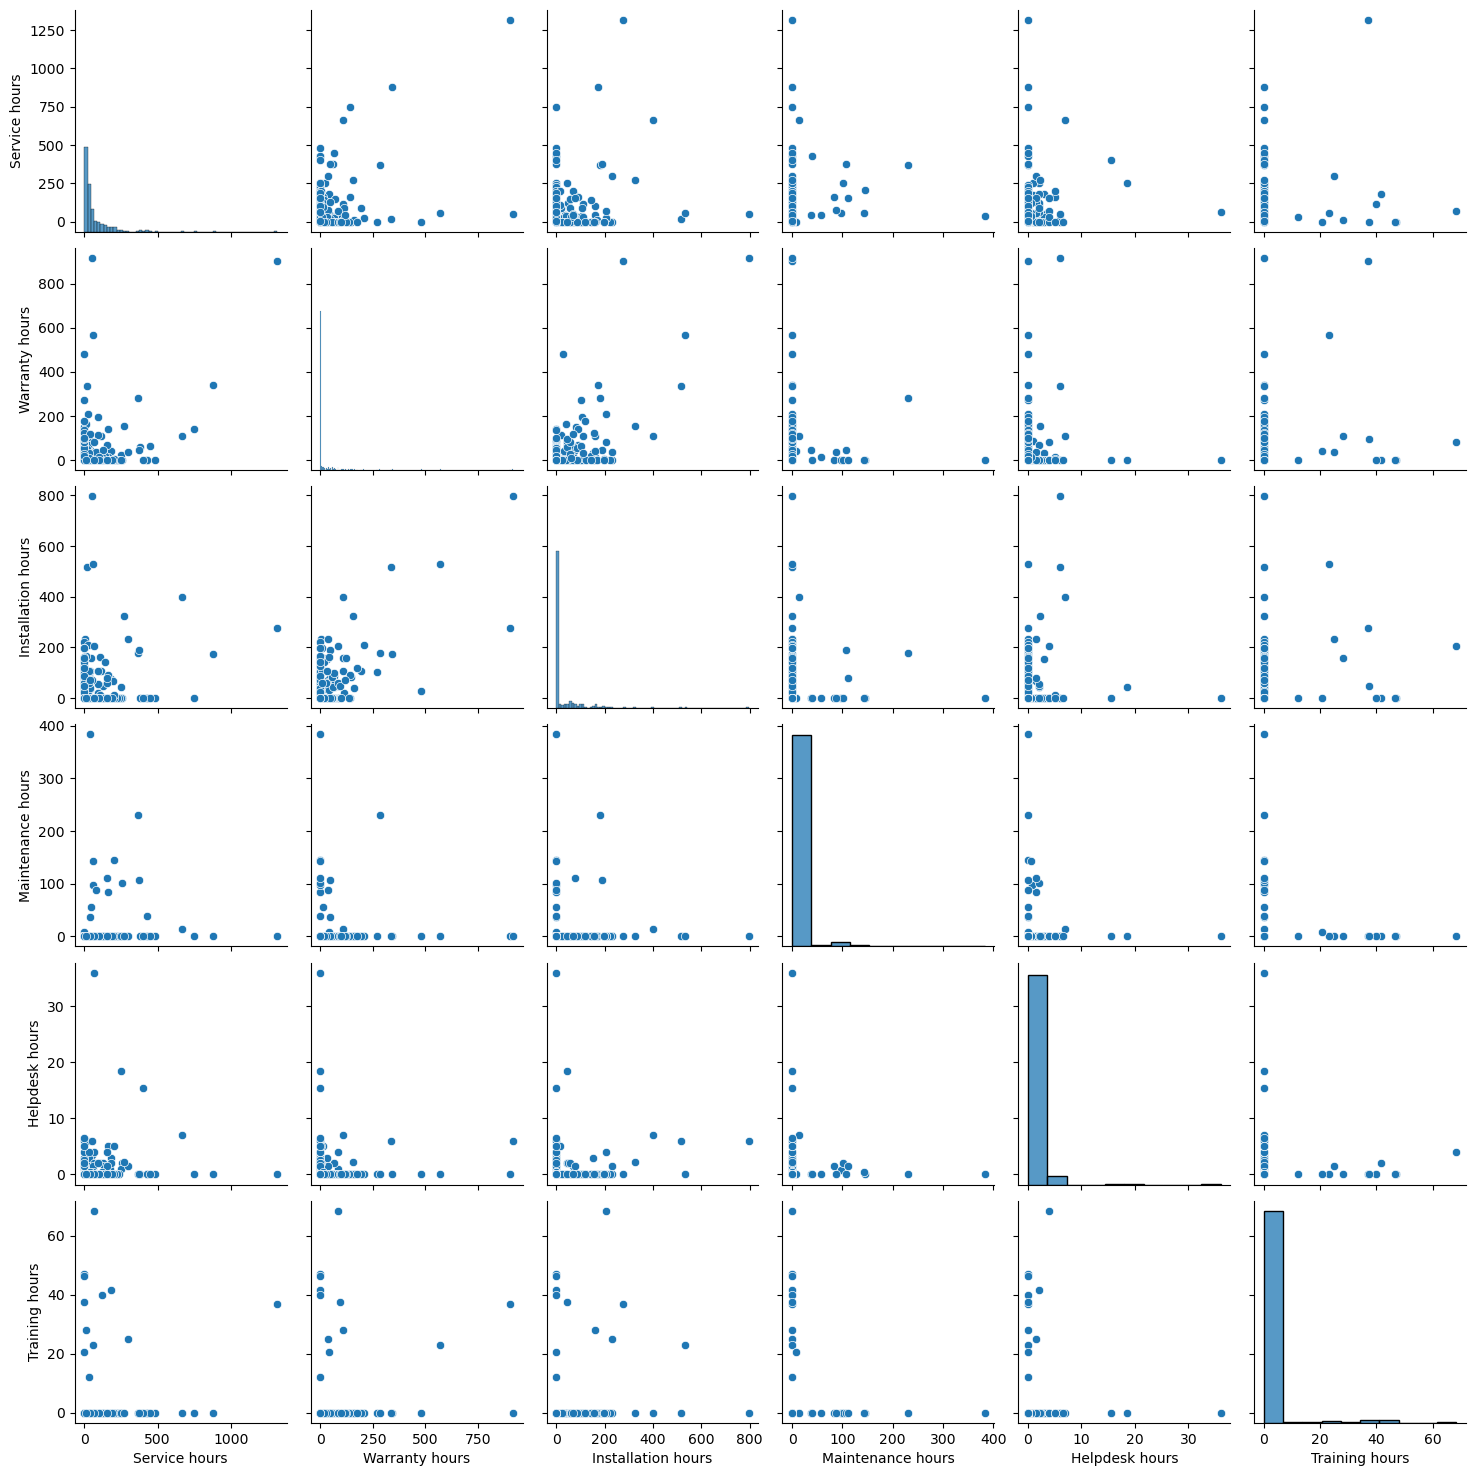

In [79]:
sns.pairplot(hours_per_customer)

In [80]:
px.scatter(hours_per_customer, x='Installation hours', y='Warranty hours')

In [81]:
from sklearn import linear_model

In [140]:
model = linear_model.LinearRegression()

In [141]:
hours_per_customer_reg = hours_per_customer[['Installation hours', 'Warranty hours']]

In [142]:
X = hours_per_customer_reg.drop('Warranty hours', axis=1)
y = hours_per_customer_reg['Warranty hours']

X.head()

,Installation hours
0,75.0
1,0.0
2,0.0
3,0.0
4,400.0


In [143]:
result = model.fit(X, y)
print('Intercept:', result.intercept_)
print('Coefficient:', result.coef_)

Intercept: 2.0659174574775605
Coefficient: [0.78356203]


In [144]:

#regression line equation
regression_line = result.intercept_ + hours_per_customer_reg['Installation hours'] * result.coef_


scatter = go.Scatter(
    x=hours_per_customer_reg['Installation hours'],
    y=hours_per_customer_reg['Warranty hours'],
    mode='markers',
    marker=dict(color='blue', opacity=0.45),
    name='Data Points'
)


line = go.Scatter(
    x=hours_per_customer_reg['Installation hours'],
    y=regression_line,
    mode='lines',
    line=dict(color='orange'),
    name='Regression Line'
)


layout = go.Layout(
    title='Linear regression model for warranty hours',
    xaxis=dict(title='Installation Hours'),
    yaxis=dict(title='Warranty Hours')
)

fig8 = go.Figure(data=[scatter, line], layout=layout)
fig8.show()

folder_path = r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\Mid-bootcamp project\plots'
file_path = os.path.join(folder_path, f'Linear regression model for warranty hours.png')
pio.write_image(fig8, file_path)

In [145]:
result.score(X, y)

0.47246861283206876

In [147]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

predictions = result.intercept_ + hours_per_customer_reg['Installation hours'] * result.coef_
MSE_OG = mean_squared_error(hours_per_customer_reg['Installation hours'], predictions)
print(predictions)
print('OG MSE:', MSE_OG)


0       60.833070
1        2.065917
2        2.065917
3        2.065917
4      315.490730
          ...    
288     38.501552
289     56.915260
290      2.065917
291      2.065917
292      2.065917
Name: Installation hours, Length: 293, dtype: float64
OG MSE: 374.6426406871522


In [148]:
X = hours_per_customer.drop(columns=['Warranty hours', 'Customer account'], axis=1)
y = hours_per_customer['Warranty hours']

X.head()

,Service hours,Installation hours,Maintenance hours,Helpdesk hours,Training hours
0,17.00,75.0,0.0,0.0,0.0
1,75.50,0.0,0.0,0.0,0.0
2,83.25,0.0,0.0,0.0,0.0
3,40.50,0.0,0.0,0.0,0.0
4,665.50,400.0,13.0,7.0,0.0


In [149]:
result = model.fit(X, y)
print('Intercept:', result.intercept_)
print('Coefficient:', result.coef_)

Intercept: -10.21744443913094
Coefficient: [ 0.19975677  0.72087452 -0.04722416 -1.90736646  0.87962653]


In [150]:
intercept = -9.776215379854346
coefficients = [0.18694672, 0.7671693, -0.04911211, -2.15437583, 1.28491407]

# Calculate predicted y values
predicted_y = intercept + X.dot(coefficients)

# Create a scatter plot
scatter = go.Scatter(
    x=y,
    y=predicted_y,
    mode='markers',
    marker=dict(color='blue', opacity=0.45),
    name='Actual vs Predicted'
)

# Create a diagonal line for perfect prediction
diagonal_line = go.Scatter(
    x=[min(y), max(y)],
    y=[min(y), max(y)],
    mode='lines',
    line=dict(color='orange', dash='dash'),
    name='Prediction line'
)

# Create layout
layout = go.Layout(
    title='Actual vs predicted warranty hours',
    xaxis=dict(title='Real Warranty hours)'),
    yaxis=dict(title='Predicted Warranty hours')
)

fig9 = go.Figure(data=[scatter, diagonal_line], layout=layout)

fig9.show()

folder_path = r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\Mid-bootcamp project\plots'
file_path = os.path.join(folder_path, f'Actual vs predicted warranty hours in multiple feature linear regression.png')
pio.write_image(fig9, file_path)

In [151]:
model.score(X, y)

0.5521954282456509

In [152]:
predictions = result.intercept_ + X * result.coef_
MSE_OG = mean_squared_error(X, predictions)
print(predictions)
print('OG MSE:', MSE_OG)

     Service hours  Installation hours  Maintenance hours  Helpdesk hours  \
0        -6.821579           43.848145         -10.217444      -10.217444   
1         4.864192          -10.217444         -10.217444      -10.217444   
2         6.412306          -10.217444         -10.217444      -10.217444   
3        -2.127295          -10.217444         -10.217444      -10.217444   
4       122.720684          278.132365         -10.831359      -23.569010   
..             ...                 ...                ...             ...   
288     -10.217444           23.303221         -10.217444      -10.217444   
289      -2.027417           40.243772         -10.217444      -10.217444   
290      20.245463          -10.217444         -10.217444      -10.217444   
291     -10.217444          -10.217444         -10.217444      -10.217444   
292      -8.719269          -10.217444         -10.217444      -10.217444   

     Training hours  
0        -10.217444  
1        -10.217444  
2        

In [92]:
# The reason whu I wanted to investigate a possible linear relation between installation and warranty hours is that it has been reported an increase in the ratio of warranty hours and installation hours over time.
# That means there is the feeling that technicians are spending too much time on warranty service due to increasing mistake in production, system delivery and installation stages. This exam is a first step in the exploration of this problem.
# In a second time I would like to collect more precise data on warranty hours to distinguish between 'good' and 'bad' warranty 
# (where good stands for 'physiological' warranty service performed in one year after the installation date and bad stands for every other type of warranty).